In [ ]:
#download dataset by using your Kaggle API Key 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [3]:
#we need to use this key by using your model 
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
#zip the file folder 
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
#import our useful labrary 
import tensorflow as tf 
from tensorflow import keras
from keras import Sequential 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten 

In [11]:
#generatour 
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
unlabel_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [14]:
#Normalization of data 
#make function add this value into it one by one 
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
#this is our final values after normalization 
train_ds = train_ds.map(process)
unalbel_ds = unlabel_ds.map(process)
test_ds = test_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
len(train_ds)

625

In [15]:
# create CNN model

model = Sequential()
#add conv and pooling layers  
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
#add dense layers 
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
#see the summary of model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [17]:
#compile our model 
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [19]:
#run our model on our train model 
save_hist = model.fit(train_ds, epochs=5, validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 88s 140ms/step - loss: 0.6933 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
625/625 [==============================] - 102s 162ms/step - loss: 0.6932 - accuracy: 0.4948 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
625/625 [==============================] - 90s 143ms/step - loss: 0.6932 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
625/625 [==============================] - 78s 124ms/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
625/625 [==============================] - 87s 139ms/step - loss: 0.6932 - accuracy: 0.4929 - val_loss: 0.6931 - val_accuracy: 0.5000


In [20]:
#see the visulaztion 

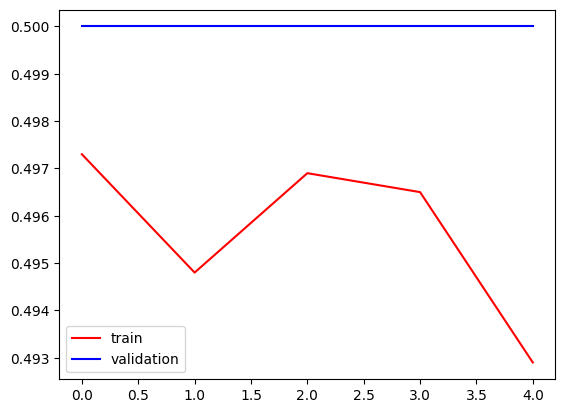

In [21]:
import matplotlib.pyplot as plt

plt.plot(save_hist.history['accuracy'],color='red',label='train')
plt.plot(save_hist.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

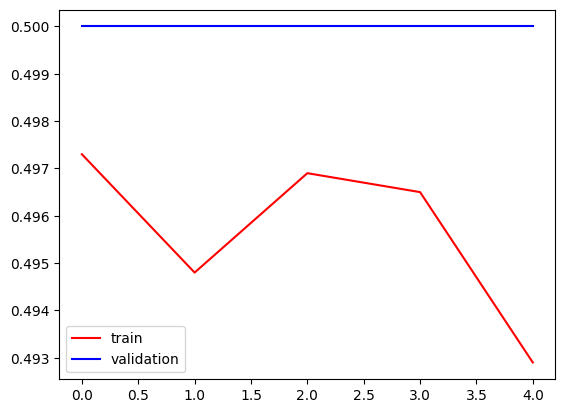

In [22]:
plt.plot(save_hist.history['accuracy'],color='red',label='train')
plt.plot(save_hist.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

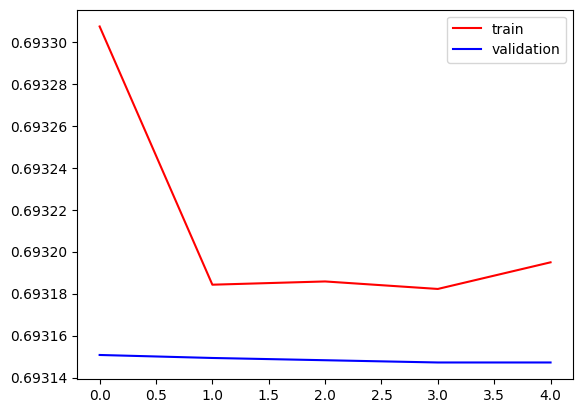

In [24]:
plt.plot(save_hist.history['loss'],color='red',label='train')
plt.plot(save_hist.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

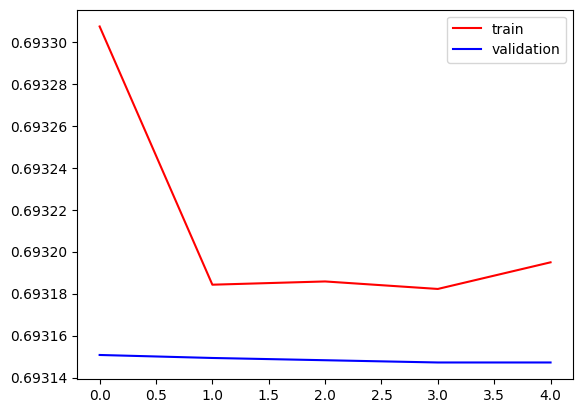

In [25]:
plt.plot(save_hist.history['loss'],color='red',label='train')
plt.plot(save_hist.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity